In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn.functional as F
import numpy as np
from tqdm.auto import tqdm

import fannypack
from lib import dpf, panda_datasets, panda_baseline_models, panda_baseline_training


In [3]:
# Experiment configuration
experiment_name = "lstm1"
dataset_args = {
    'use_proprioception': True,
    'use_haptics': True,
    'use_vision': True,
    'vision_interval': 2,
}

In [4]:
print("Creating model...")
model = panda_baseline_models.PandaLSTMModel()
buddy = fannypack.utils.Buddy(
    experiment_name,
    model,
    log_dir="lstm_logs",
    checkpoint_dir="lstm_checkpoints",
    metadata_dir="lstm_metadata",
)
buddy.add_metadata(dataset_args)

Creating model...
[buddy-lstm1] Using device: cuda
[buddy-lstm1] No checkpoint found
[buddy-lstm1] Wrote metadata to: lstm_metadata/lstm1.yaml


In [5]:
print("Creating dataset...")
dataset_length2 = panda_datasets.PandaSubsequenceDataset(
    'data/gentle_push_10.hdf5',
    subsequence_length=2,
    **dataset_args)
dataset_length4 = panda_datasets.PandaSubsequenceDataset(
    'data/gentle_push_10.hdf5',
    subsequence_length=4,
    **dataset_args)
dataset_length8 = panda_datasets.PandaSubsequenceDataset(
    'data/gentle_push_10.hdf5',
    subsequence_length=8,
    **dataset_args)
dataset_length16 = panda_datasets.PandaSubsequenceDataset(
    'data/gentle_push_10.hdf5',
    subsequence_length=16,
    **dataset_args)

Creating dataset...


In [6]:
dataloader = torch.utils.data.DataLoader(
    dataset_length2, batch_size=16, shuffle=True, num_workers=2, drop_last=True)
model.batch_size = 16
for _ in tqdm(range(30)):
    for batch_idx, batch in enumerate(tqdm(dataloader)):
        states, observations, controls = fannypack.utils.to_device(batch, buddy.device)
        predicted_states = model(observations, controls)
        assert predicted_states.shape == states.shape
        loss = F.mse_loss(predicted_states, states)
        buddy.minimize(loss, checkpoint_interval=500)
        
        with buddy.log_scope("lstm_training"):
            buddy.log("loss", loss)
            buddy.log("predicted_states_mean", predicted_states.mean())
            buddy.log("predicted_states_std", predicted_states.std())
            buddy.log("label_states_mean", states.mean())
            buddy.log("label_states_std", states.std())

buddy.save_checkpoint()

[buddy-lstm1] Saved checkpoint to path: lstm_checkpoints/lstm1-0000000000000500.ckpt



[buddy-lstm1] Saved checkpoint to path: lstm_checkpoints/lstm1-0000000000001000.ckpt



[buddy-lstm1] Saved checkpoint to path: lstm_checkpoints/lstm1-0000000000001500.ckpt



[buddy-lstm1] Saved checkpoint to path: lstm_checkpoints/lstm1-0000000000002000.ckpt





[buddy-lstm1] Saved checkpoint to path: lstm_checkpoints/lstm1-0000000000002250.ckpt


In [7]:
dataloader = torch.utils.data.DataLoader(
    dataset_length4, batch_size=16, shuffle=True, num_workers=2, drop_last=True)
model.batch_size = 16
for _ in tqdm(range(30)):
    for batch_idx, batch in enumerate(tqdm(dataloader)):
        states, observations, controls = fannypack.utils.to_device(batch, buddy.device)
        predicted_states = model(observations, controls)
        assert predicted_states.shape == states.shape
        loss = F.mse_loss(predicted_states, states)
        buddy.minimize(loss, checkpoint_interval=500)
        
        with buddy.log_scope("lstm_training"):
            buddy.log("loss", loss)
            buddy.log("predicted_states_mean", predicted_states.mean())
            buddy.log("predicted_states_std", predicted_states.std())
            buddy.log("label_states_mean", states.mean())
            buddy.log("label_states_std", states.std())

buddy.save_checkpoint()

dataloader = torch.utils.data.DataLoader(
    dataset_length8, batch_size=16, shuffle=True, num_workers=2, drop_last=True)
model.batch_size = 16
for _ in tqdm(range(30)):
    for batch_idx, batch in enumerate(tqdm(dataloader)):
        states, observations, controls = fannypack.utils.to_device(batch, buddy.device)
        predicted_states = model(observations, controls)
        assert predicted_states.shape == states.shape
        loss = F.mse_loss(predicted_states, states)
        buddy.minimize(loss, checkpoint_interval=500)
        
        with buddy.log_scope("lstm_training"):
            buddy.log("loss", loss)
            buddy.log("predicted_states_mean", predicted_states.mean())
            buddy.log("predicted_states_std", predicted_states.std())
            buddy.log("label_states_mean", states.mean())
            buddy.log("label_states_std", states.std())

buddy.save_checkpoint()

dataloader = torch.utils.data.DataLoader(
    dataset_length16, batch_size=16, shuffle=True, num_workers=2, drop_last=True)
model.batch_size = 16
for _ in tqdm(range(30)):
    for batch_idx, batch in enumerate(tqdm(dataloader)):
        states, observations, controls = fannypack.utils.to_device(batch, buddy.device)
        predicted_states = model(observations, controls)
        assert predicted_states.shape == states.shape
        loss = F.mse_loss(predicted_states, states)
        buddy.minimize(loss, checkpoint_interval=500)
        
        with buddy.log_scope("lstm_training"):
            buddy.log("loss", loss)
            buddy.log("predicted_states_mean", predicted_states.mean())
            buddy.log("predicted_states_std", predicted_states.std())
            buddy.log("label_states_mean", states.mean())
            buddy.log("label_states_std", states.std())

buddy.save_checkpoint()

[buddy-lstm1] Saved checkpoint to path: lstm_checkpoints/lstm1-0000000000002500.ckpt



[buddy-lstm1] Saved checkpoint to path: lstm_checkpoints/lstm1-0000000000003000.ckpt





[buddy-lstm1] Saved checkpoint to path: lstm_checkpoints/lstm1-0000000000003360.ckpt


[buddy-lstm1] Saved checkpoint to path: lstm_checkpoints/lstm1-0000000000003500.ckpt





[buddy-lstm1] Saved checkpoint to path: lstm_checkpoints/lstm1-0000000000003900.ckpt


[buddy-lstm1] Saved checkpoint to path: lstm_checkpoints/lstm1-0000000000004000.ckpt





[buddy-lstm1] Saved checkpoint to path: lstm_checkpoints/lstm1-0000000000004170.ckpt


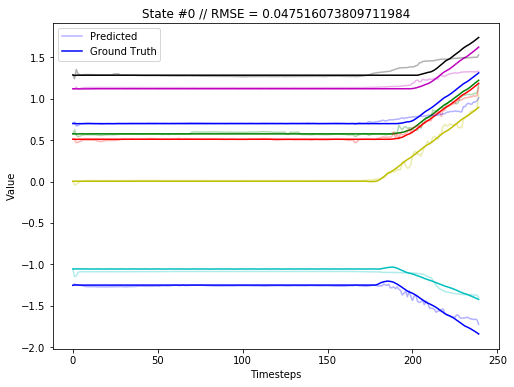

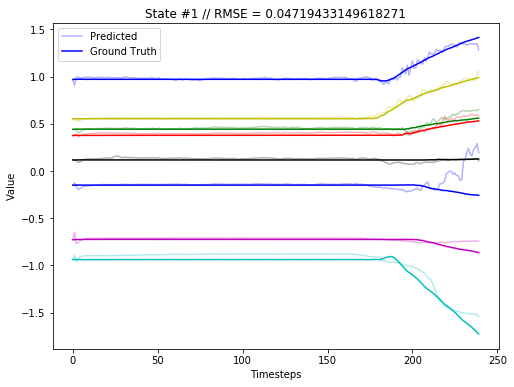

In [8]:
eval_trajectories = panda_datasets.load_trajectories(("data/gentle_push_10.hdf5", 8), **dataset_args)

pred, actual = panda_baseline_training.rollout_lstm(model, eval_trajectories)
panda_baseline_training.eval_rollout(pred, actual, plot=True)

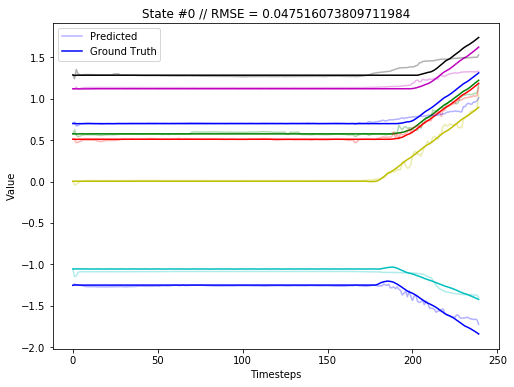

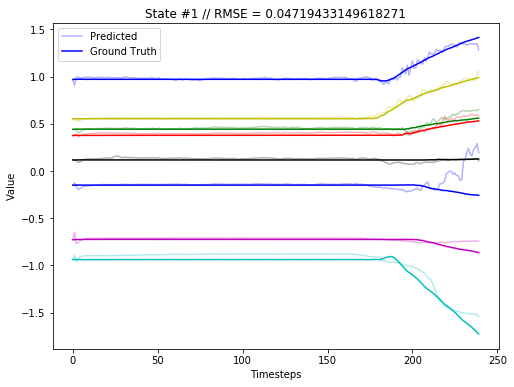

In [9]:
pred, actual = panda_baseline_training.rollout_lstm(model, eval_trajectories)
panda_baseline_training.eval_rollout(pred, actual, plot=True)

In [10]:
buddy.save_checkpoint("stable")

[buddy-lstm1] Saved checkpoint to path: lstm_checkpoints/lstm1-stable.ckpt


In [11]:
buddy.save_checkpoint()

[buddy-lstm1] Skipping redundant checkpoint save
